In [51]:
#importing all the library and files 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

dataset = pd.read_csv('heart_attack_2_dammy.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           918 non-null    int64
 1   Sex                           918 non-null    int64
 2   ChestPain                     918 non-null    int64
 3   Blood_Pressure                918 non-null    int64
 4   Cholesterol                   918 non-null    int64
 5   electrocardiographic results  918 non-null    int64
 6   Max Heart Rate                918 non-null    int64
 7   ST_Slope                      918 non-null    int64
 8   HeartDisease                  918 non-null    int64
dtypes: int64(9)
memory usage: 64.7 KB


In [52]:
# making catagorocal and numerical columns seperate for data processsing 
cate_val = []
cont_val =[]
for column in dataset.columns :
    if dataset[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)
print("catagorocal data\n")
print(cate_val)
print("\nnumerical data\n")
cont_val

catagorocal data

['Sex', 'ChestPain', 'electrocardiographic results', 'ST_Slope', 'HeartDisease']

numerical data



['Age', 'Blood_Pressure', 'Cholesterol', 'Max Heart Rate']

In [53]:
dataset.describe()

,Age,Sex,ChestPain,Blood_Pressure,Cholesterol,electrocardiographic results,Max Heart Rate,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,1.781046,132.396514,198.799564,1.989107,136.809368,0.567538,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.631671,25.460334,0.618959,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,1.000000,60.000000,0.000000,0.000000
25%,47.000000,1.000000,1.000000,120.000000,173.250000,2.000000,120.000000,0.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,223.000000,2.000000,138.000000,0.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,267.000000,2.000000,156.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,3.000000,202.000000,2.000000,1.000000


In [54]:
#Hypothesis 1

In [55]:
#finding the different sex where 1 means male and 0 means females
X=dataset[dataset["Sex"]==1].reset_index()  
Y=dataset[dataset["Sex"]==0].reset_index()   
display(X.head(),Y.head())

,index,Age,Sex,ChestPain,Blood_Pressure,Cholesterol,electrocardiographic results,Max Heart Rate,ST_Slope,HeartDisease
0,0,40,1,2,140,289,2,172,1,0
1,2,37,1,2,130,283,3,98,1,0
2,4,54,1,3,150,195,2,122,1,0
3,5,39,1,3,120,339,2,170,1,0
4,7,54,1,2,110,208,2,142,1,0


,index,Age,Sex,ChestPain,Blood_Pressure,Cholesterol,electrocardiographic results,Max Heart Rate,ST_Slope,HeartDisease
0,1,49,0,3,160,180,2,156,0,1
1,3,48,0,1,138,214,2,108,0,1
2,6,45,0,2,130,237,2,170,1,0
3,9,48,0,2,120,284,2,120,1,0
4,10,37,0,3,130,211,2,142,1,0


In [56]:
print("Percent of '1' at high risk of heart attack = {} %" .format(round((len(X[X["HeartDisease"]==1])/len(X)*100),2)))
print(" '1' average high-risk age = {} yrs\n" .format(round(X[X["HeartDisease"]==1]["Age"].mean())))

print("Percent of '0' at high risk of heart attack = {} %" .format(round((len(Y[Y["HeartDisease"]==1])/len(Y)*100),2)))
print("'0' Average high-risk age = {} yrs" .format(round(Y[Y["HeartDisease"]==1]["Age"].mean())))

Percent of '1' at high risk of heart attack = 63.17 %
 '1' average high-risk age = 56 yrs

Percent of '0' at high risk of heart attack = 25.91 %
'0' Average high-risk age = 56 yrs


Female Value Counts: 
1    458
0    267
Name: HeartDisease, dtype: int64
Male Value Counts: 
0    143
1     50
Name: HeartDisease, dtype: int64


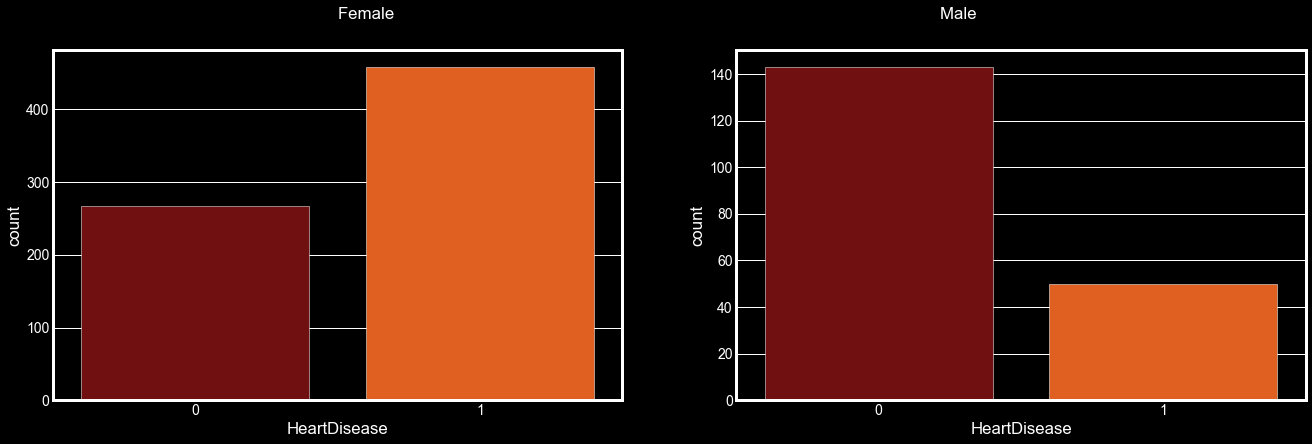

In [57]:
#printing the number of postive heart problem and people with no heart problem in different genders where 1 = positive and 0= negative.
print("Female Value Counts: \n{}".format(X['HeartDisease'].value_counts()))
print("Male Value Counts: \n{}".format(Y['HeartDisease'].value_counts()))

fig, ax1 = plt.subplots(1,2, figsize=(20,6))
plt.suptitle("Female                                                                                                                      Male")
sns.countplot("HeartDisease", data=X, palette='gist_heat',ax=ax1[0])
sns.countplot("HeartDisease", data=Y, palette='gist_heat',ax=ax1[1])
plt.show()

In [58]:
X= dataset.drop(["ChestPain","Blood_Pressure","Cholesterol","electrocardiographic results","Max Heart Rate","ST_Slope","HeartDisease"],axis =1)
Y = dataset["HeartDisease"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4 , random_state = 42)


In [59]:
knn = KNeighborsClassifier(n_neighbors=61)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=61)

In [60]:
Y_pred3 = knn.predict(X_test)
accuracy_score(Y_test,Y_pred3)

0.625

In [61]:
#Checking K values which will suit best for the model
Score = []
for k in range(1,70):
    knn =KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    Score.append(accuracy_score(Y_test,Y_pred))
Score

[0.5434782608695652,
 0.5054347826086957,
 0.5733695652173914,
 0.5570652173913043,
 0.6304347826086957,
 0.5706521739130435,
 0.5978260869565217,
 0.5815217391304348,
 0.6222826086956522,
 0.6222826086956522,
 0.6603260869565217,
 0.6141304347826086,
 0.6521739130434783,
 0.6114130434782609,
 0.6195652173913043,
 0.6304347826086957,
 0.6222826086956522,
 0.6385869565217391,
 0.6413043478260869,
 0.6385869565217391,
 0.6385869565217391,
 0.6304347826086957,
 0.6413043478260869,
 0.6331521739130435,
 0.6222826086956522,
 0.6413043478260869,
 0.6195652173913043,
 0.6277173913043478,
 0.6277173913043478,
 0.6277173913043478,
 0.6385869565217391,
 0.6385869565217391,
 0.6385869565217391,
 0.6358695652173914,
 0.6385869565217391,
 0.6385869565217391,
 0.6385869565217391,
 0.6385869565217391,
 0.6385869565217391,
 0.6385869565217391,
 0.6413043478260869,
 0.6385869565217391,
 0.6358695652173914,
 0.6331521739130435,
 0.6331521739130435,
 0.6331521739130435,
 0.6358695652173914,
 0.6222826086

In [62]:
from sklearn.neighbors import KNeighborsClassifier


In [63]:
knn = KNeighborsClassifier()
knn.fit(X,Y)

KNeighborsClassifier()

In [64]:
new_data = pd.DataFrame({'Age': 15,'Sex':1},index=[0])
new_data

,Age,Sex
0,15,1


In [65]:
p = knn.predict(new_data)
if p[0] == 0:
    print("No Disease , You can healty But have regular check-ups")
else:
    print("***Warning***")
    print("There is chance of Heart Disease Contact Your Doctor")

No Disease , You can healty But have regular check-ups


In [66]:
#hypothesis 2
#The body of Medical Researcher are tring to find the which which of the chest pain is observed most 
#common in the positive heart paitents with different ages, so that they if anyone detected with that 
#pain can be tested for heart diease as well.

In [67]:
#checking all the four different kind of pains using head function
x_ChestPain=dataset[dataset["ChestPain"]==1].reset_index()  
y_ChestPain=dataset[dataset["ChestPain"]==2].reset_index() 
z_ChestPain=dataset[dataset["ChestPain"]==3].reset_index()  
a_ChestPain=dataset[dataset["ChestPain"]==4].reset_index() 
display(x_ChestPain.head(),y_ChestPain.head(),z_ChestPain.head(),a_ChestPain.head())

,index,Age,Sex,ChestPain,Blood_Pressure,Cholesterol,electrocardiographic results,Max Heart Rate,ST_Slope,HeartDisease
0,3,48,0,1,138,214,2,108,0,1
1,8,37,1,1,140,207,2,130,0,1
2,13,49,1,1,140,234,2,140,0,1
3,16,38,1,1,110,196,2,166,0,1
4,18,60,1,1,100,248,2,125,0,1


,index,Age,Sex,ChestPain,Blood_Pressure,Cholesterol,electrocardiographic results,Max Heart Rate,ST_Slope,HeartDisease
0,0,40,1,2,140,289,2,172,1,0
1,2,37,1,2,130,283,3,98,1,0
2,6,45,0,2,130,237,2,170,1,0
3,7,54,1,2,110,208,2,142,1,0
4,9,48,0,2,120,284,2,120,1,0


,index,Age,Sex,ChestPain,Blood_Pressure,Cholesterol,electrocardiographic results,Max Heart Rate,ST_Slope,HeartDisease
0,1,49,0,3,160,180,2,156,0,1
1,4,54,1,3,150,195,2,122,1,0
2,5,39,1,3,120,339,2,170,1,0
3,10,37,0,3,130,211,2,142,1,0
4,14,42,0,3,115,211,3,137,1,0


,index,Age,Sex,ChestPain,Blood_Pressure,Cholesterol,electrocardiographic results,Max Heart Rate,ST_Slope,HeartDisease
0,20,43,0,4,100,223,2,142,1,0
1,88,43,1,4,120,291,3,155,0,1
2,118,35,0,4,120,160,3,185,1,0
3,119,34,1,4,140,156,2,180,0,1
4,165,46,1,4,140,272,2,175,0,1


In [68]:
#checking the percentage of each chest pain and the most targeted age against that
print("Percent of '1' at high risk of heart attack = {} %" .format(round((len(x_ChestPain[x_ChestPain["HeartDisease"]==1])/len(X)*100),2)))
print("Asymptomatic average high-risk age = {} yrs\n" .format(round(x_ChestPain[x_ChestPain["HeartDisease"]==1]["Age"].mean())))

print("Percent of '2' at high risk of heart attack = {} %" .format(round((len(y_ChestPain[y_ChestPain["HeartDisease"]==1])/len(Y)*100),2)))
print("Atypical-Angina Average high-risk age = {} yrs" .format(round(y_ChestPain[y_ChestPain["HeartDisease"]==1]["Age"].mean())))

print("Percent of '3' at high risk of heart attack = {} %" .format(round((len(z_ChestPain[z_ChestPain["HeartDisease"]==1])/len(X)*100),2)))
print(" Non-Anginal Pain average high-risk age = {} yrs\n" .format(round(z_ChestPain[z_ChestPain["HeartDisease"]==1]["Age"].mean())))

print("Percent of '4' at high risk of heart attack = {} %" .format(round((len(a_ChestPain[a_ChestPain["HeartDisease"]==1])/len(Y)*100),2)))
print("Typical Angina Average high-risk age = {} yrs" .format(round(a_ChestPain[a_ChestPain["HeartDisease"]==1]["Age"].mean())))

Percent of '1' at high risk of heart attack = 42.7 %
Asymptomatic average high-risk age = 56 yrs

Percent of '2' at high risk of heart attack = 2.61 %
Atypical-Angina Average high-risk age = 56 yrs
Percent of '3' at high risk of heart attack = 7.84 %
 Non-Anginal Pain average high-risk age = 57 yrs

Percent of '4' at high risk of heart attack = 2.18 %
Typical Angina Average high-risk age = 55 yrs


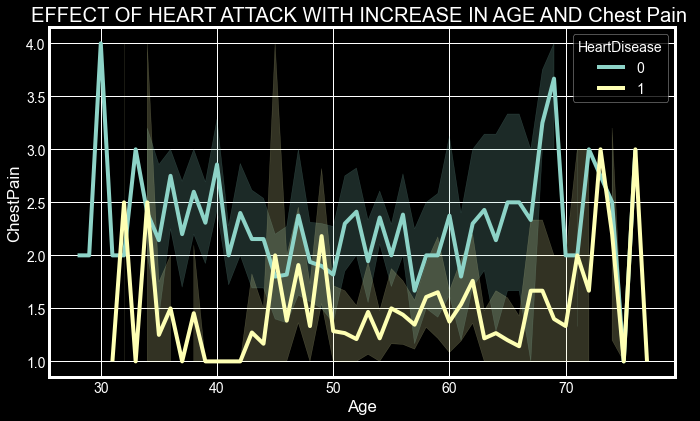

In [69]:
#plotting the graph of above analysis and 0 means non heart diesase and 1 means with heart problems
plt.figure(figsize=(10,6))
sns.lineplot(x="Age",y="ChestPain",hue="HeartDisease",data=dataset)
plt.title("EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND Chest Pain ")
plt.grid(True)
plt.show()

In [70]:
#traing the data set
X_ChestPain= dataset.drop(["Sex","Blood_Pressure","Cholesterol","electrocardiographic results","Max Heart Rate","ST_Slope","HeartDisease"],axis =1)
Y_ChestPain = dataset["HeartDisease"]
X_train_ChestPain,X_test_ChestPain,Y_train_ChestPain,Y_test_ChestPain = train_test_split(X_ChestPain,Y_ChestPain,test_size = 0.4 , random_state = 42)

In [71]:
#using the knn classifier
knn = KNeighborsClassifier()
knn.fit(X_train_ChestPain,Y_train_ChestPain)

KNeighborsClassifier()

In [72]:
#getting the accuracy
Y_pred3_ChestPain = knn.predict(X_test_ChestPain)
accuracy_score(Y_test_ChestPain,Y_pred3_ChestPain)

0.7554347826086957

In [73]:
#finding te best k value 
Score = []
for k in range(1,10):
    knn =KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_ChestPain,Y_train_ChestPain)
    Y_pred = knn.predict(X_test_ChestPain)
    Score.append(accuracy_score(Y_test_ChestPain,Y_pred))
Score

[0.6739130434782609,
 0.6385869565217391,
 0.7336956521739131,
 0.7038043478260869,
 0.7554347826086957,
 0.7119565217391305,
 0.7527173913043478,
 0.7228260869565217,
 0.7581521739130435]

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_ChestPain,Y_ChestPain)

KNeighborsClassifier()

In [75]:
# giving random data to pridect the values
new_data_chestpain = pd.DataFrame({'Age': 32,'Chest Pain':1},index=[0])
new_data_chestpain

,Age,Chest Pain
0,32,1


In [76]:
p = knn.predict(new_data_chestpain)
if p[0] == 0:
    print("No Disease , You can healty But have regular check-ups")
else:
    print("***Warning***")
    print("There is chance of Heart Disease Contact Your Doctor")

***Warning***
There is chance of Heart Disease Contact Your Doctor


In [77]:
#hypothesis 3
#The Body of Medical Researcher are trying to find the different level of Cholesterol ,
#Heart rate and there Blood pressure routine in person, So that they can ask people to do regular check-ups 
#and   detecting the chances of heart problem and be treated on time.
from mpl_toolkits.mplot3d import Axes3D


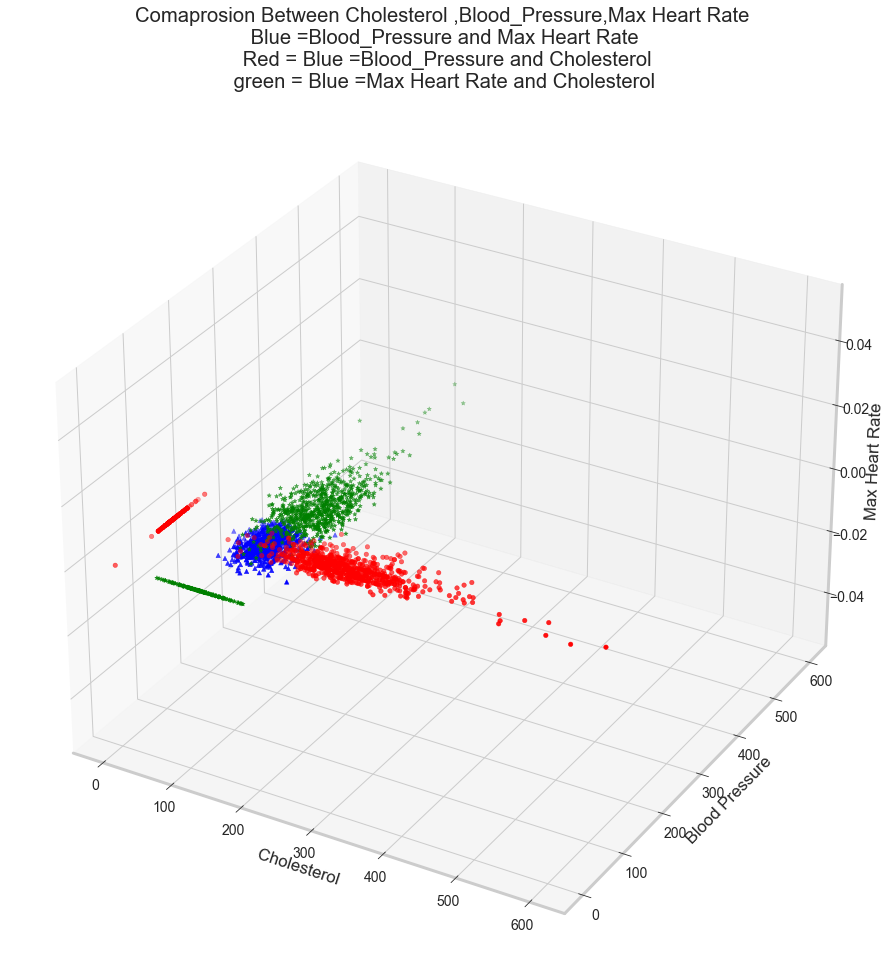

In [78]:
#plotting different commbinated on 3d graph 
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
a= dataset["HeartDisease"].values
x = dataset['Cholesterol'].values
y = dataset['Blood_Pressure'].values
z = dataset['Max Heart Rate'].values
ax.scatter(x, y, c='r', marker='o')
ax.scatter( y, z, c='b', marker='^')
ax.scatter( z, x, c='g', marker='*')
ax.set_title("Comaprosion Between Cholesterol ,Blood_Pressure,Max Heart Rate \n Blue =Blood_Pressure and Max Heart Rate \n Red = Blue =Blood_Pressure and Cholesterol\n green = Blue =Max Heart Rate and Cholesterol ")
ax.set_xlabel(" Cholesterol")
ax.set_ylabel(" Blood Pressure")
ax.set_zlabel(" Max Heart Rate")
plt.show()

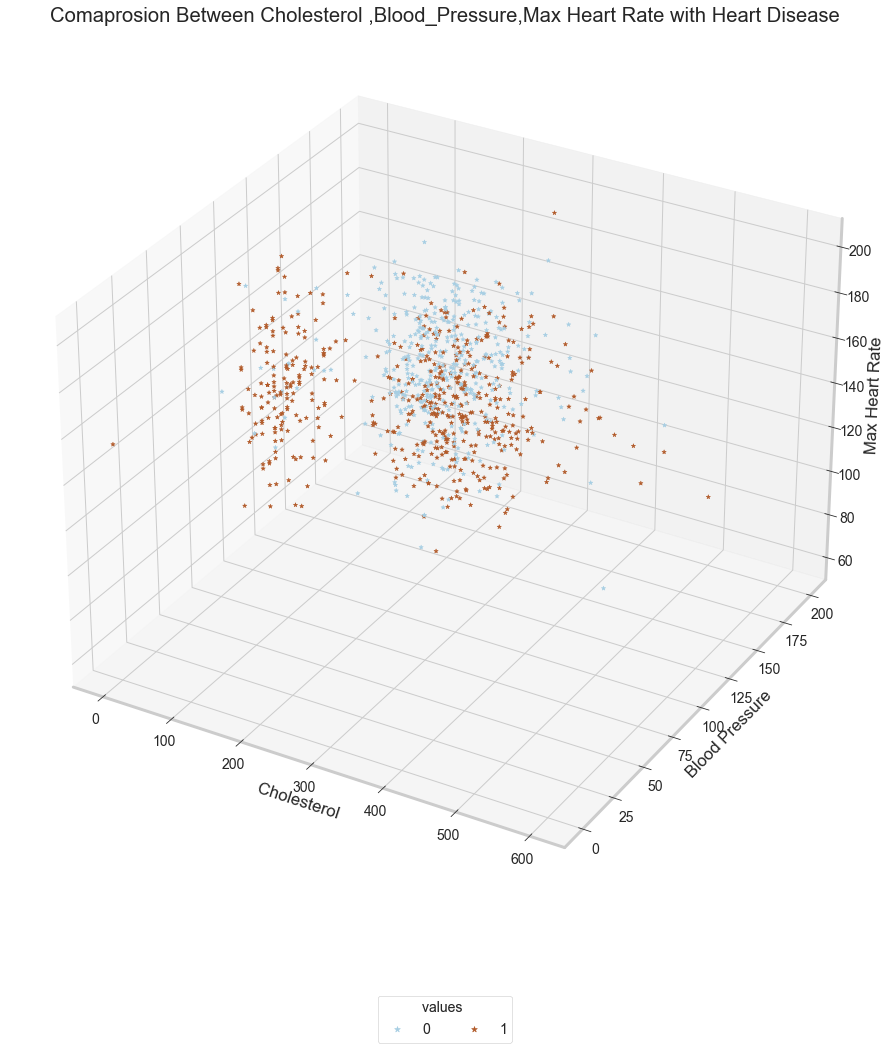

In [79]:
# comparing 4 different catagories with target values with is 0 and 1 
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
a= dataset["HeartDisease"].values
x = dataset['Cholesterol'].values
y = dataset['Blood_Pressure'].values
z = dataset['Max Heart Rate'].values
g= ax.scatter(x, y, z,c=a, marker='*' ,depthshade=False, cmap='Paired')
ax.set_title("Comaprosion Between Cholesterol ,Blood_Pressure,Max Heart Rate with Heart Disease")
ax.set_xlabel(" Cholesterol")
ax.set_ylabel(" Blood Pressure")
ax.set_zlabel(" Max Heart Rate")
legend = ax.legend(*g.legend_elements(), loc="lower center", title="values ", borderaxespad=-10, ncol=4)
ax.add_artist(legend)
plt.show()

In [80]:
#traing the data set

X_heart= dataset.drop(["Age","Sex","electrocardiographic results","ST_Slope","HeartDisease","ChestPain"],axis =1)
Y_heart = dataset["HeartDisease"]
X_train_heart,X_test_heart,Y_train_heart,Y_test_heart = train_test_split(X_heart,Y_heart,test_size = 0.4 , random_state = 42)
X_heart

,Blood_Pressure,Cholesterol,Max Heart Rate
0,140,289,172
1,160,180,156
2,130,283,98
3,138,214,108
4,150,195,122
...,...,...,...
913,110,264,132
914,144,193,141
915,130,131,115
916,130,236,174


In [81]:
#using the knn classifier

knn = KNeighborsClassifier(n_neighbors=39)
knn.fit(X_train_heart,Y_train_heart)

KNeighborsClassifier(n_neighbors=39)

In [82]:
#Accuracy of the model
Y_pred3_heart = knn.predict(X_test_heart)
accuracy_score(Y_test_heart,Y_pred3_heart)

0.7119565217391305

In [83]:
#getting the best K values 
Score = []
for k in range(1,40):
    knn =KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_heart,Y_train_heart)
    Y_pred = knn.predict(X_test_heart)
    Score.append(accuracy_score(Y_test_heart,Y_pred))
Score

[0.6168478260869565,
 0.5570652173913043,
 0.6521739130434783,
 0.6277173913043478,
 0.6847826086956522,
 0.6711956521739131,
 0.7010869565217391,
 0.6820652173913043,
 0.6956521739130435,
 0.6847826086956522,
 0.6820652173913043,
 0.6820652173913043,
 0.6929347826086957,
 0.6902173913043478,
 0.6929347826086957,
 0.6820652173913043,
 0.6847826086956522,
 0.6820652173913043,
 0.6902173913043478,
 0.6956521739130435,
 0.6956521739130435,
 0.6956521739130435,
 0.7010869565217391,
 0.6929347826086957,
 0.6929347826086957,
 0.6929347826086957,
 0.6956521739130435,
 0.6847826086956522,
 0.7038043478260869,
 0.6929347826086957,
 0.7065217391304348,
 0.6956521739130435,
 0.7038043478260869,
 0.6956521739130435,
 0.717391304347826,
 0.7038043478260869,
 0.7119565217391305,
 0.7010869565217391,
 0.7119565217391305]

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier()
knn.fit(X_heart,Y_heart)

KNeighborsClassifier()

In [86]:
#giving the random data to test the model
new_data_heart = pd.DataFrame({'Cholesterol': 1,'Blood_Pressure':175,'Max Heart Rate':0},index=[0])
new_data_heart

,Cholesterol,Blood_Pressure,Max Heart Rate
0,1,175,0


In [87]:
p = knn.predict(new_data_heart)
if p[0] == 0:
    print("No Disease , You can healty But have regular check-ups")
else:
    print("***Warning***")
    print("There is chance of Heart Disease Contact Your Doctor")

No Disease , You can healty But have regular check-ups
